# 1-) What are we doing and why?

   The aim of the project is to show a price/performance analysis in AirBNB. This analysis will show if prices are above or below average according to the price comparison and to the number of entertainment centers such as theater hall, cinema hall and transportations center such as metro stations and bus stations. 
  ----------------
  So, people who are uncertain about to which place to go can look for our analyzes and decide. Our analyzes are about the price / entertainment and transportation avaliability so that people will pay less and have a good time.
----------------

# 2-) Our datasets

 Currently, we have used Airbnb data which is provided by cs210, also we have used the data about where are the bus station shelters which people can use busses so we could create a map and make analyzes the amount of avaliability of transportation. In addition, we have used a data set about the entertainment which shows the location and type of the entertainment buildings such as theatres, culturel centers, museums.

 -
 Airbnb in New York includes prices, locations, room types.

 -
 Entertainment buildings in New York includes locations, entertainment types.

 -
 Bus-Stop shelters in New York includes locations.


# 3-) methods we have used, data preprocessing etc.
learning models you have tried


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [ ]:
#@title Our Airbnb dataset's first 5 elements looks like this
fname = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


We have discarded any data with missing information so that our data is more precise and does not include any miss information.

In [ ]:
df = df.dropna(how="any")

We separated the data into  5 neighboorhood groups in New York and found average prices to rent a room/house without looking its type.


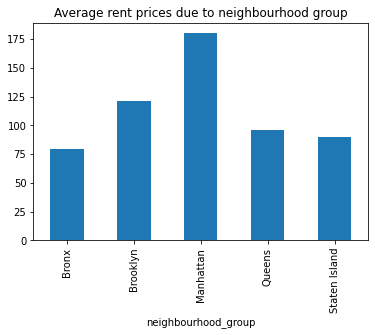

In [ ]:
df_prizeNeig = df.groupby('neighbourhood_group')['price'].agg(np.mean)
df_prizeNeig.plot.bar()
plt.title("Average rent prices due to neighbourhood group")
plt.show()

Also, We divided the rooms into 4 types and showed the average prices were 

---

determined according to the room types in New York.






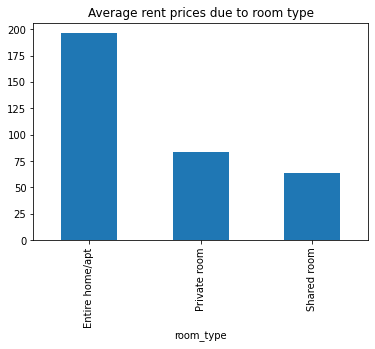

In [ ]:
df_prizeRoomType = df.groupby("room_type")["price"].agg(np.mean)
df_prizeRoomType.plot.bar()
plt.title("Average rent prices due to room type")
plt.show()

At the end, We combined them as a more clear output which shows us the average prices of all types of rooms for all neighbourhood groups.
--------

In [ ]:
deneme=  df.groupby(['neighbourhood_group','room_type'])["price"].agg(np.mean)
deneme.head(1000)

neighbourhood_group  room_type      
Bronx                Entire home/apt    120.938312
                     Private room        57.093511
                     Shared room         56.930233
Brooklyn             Entire home/apt    171.281897
                     Private room        73.349562
                     Shared room         45.458621
Manhattan            Entire home/apt    230.200964
                     Private room       106.607488
                     Shared room         77.980337
Queens               Entire home/apt    139.225603
                     Private room        69.302838
                     Shared room         64.467105
Staten Island        Entire home/apt    125.366667
                     Private room        57.584906
                     Shared room         57.600000
Name: price, dtype: float64

Then, we opened the datas about entertainment and transportation in New York
- Also, reorganised the entertainment data because some location values were different. For example, Jackson Heights is considered as Queens but the data itself considered it as a different group and there was only 1 data with the New York group and it was between Brooklyn and Staten Island but close to Staten Island area, so we replaced the value to be useful for our analyze.
-----

In [ ]:
fnameEntertainment = "Latin_Cultural_Organizations_Map.csv"
dfEnter = pd.read_csv(join(path_prefix, fnameEntertainment))
dfEnter["Borough"].replace({"Jackson Heights": "Queens", "New York": "Staten Island"}, inplace=True)
dfEnterGrouped = dfEnter.groupby('Borough').count()
dfEnterGrouped.head()

,Business Organization,Business Type Other,Company Name,Company Description,Organization Location,Street Address,Apt Number,Postcode,Business Phone,Contact Name,Contact Title,Contact Phone,Contact Fax,Location,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
Borough,,,,,,,,,,,,,,,,,,,,,,
Bronx,13,0,13,13,13,13,2,13,0,12,11,13,0,13,12,12,12,12,12,12,12,12
Brooklyn,7,0,7,7,7,7,1,7,1,6,4,6,0,7,4,4,4,4,4,4,4,4
Manhattan,58,0,58,58,58,58,28,58,0,49,44,56,0,58,55,55,55,55,55,55,55,55
Queens,4,0,4,4,4,4,1,4,0,4,1,4,0,4,3,3,3,3,3,3,3,3
Staten Island,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
fnameBus = "Bus_Stop_Shelter.csv"
dfBus = pd.read_csv(join(path_prefix, fnameBus))
dfBus.head()
dfBus = dfBus.groupby('BoroName').count()
dfBus.head()

,CounDist,BoroCD,AssemDist,the_geom,CongDist,StSenDist,SHELTER_ID,LOCATION,AT_BETWEEN,LONGITUDE,LATITUDE,AssetID,BoroCode,Street,SegmentID,PhysicalID,NODEID
BoroName,,,,,,,,,,,,,,,,,
Bronx,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576
Brooklyn,896,896,896,896,896,896,896,896,896,896,896,896,896,894,894,896,896
Manhattan,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753
Queens,987,987,987,987,987,987,987,987,987,987,987,987,987,986,986,987,987
Staten Island,216,216,216,216,216,216,216,216,216,216,216,216,216,215,215,216,216


This is the graph that shows the amount of bus-stops in every neighbourhood groups, we can clearly see that staten island is lack of transportation opportunities.
--

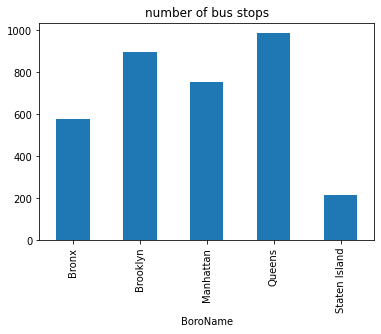

In [ ]:
dfBus["LOCATION"].plot.bar()
plt.title("number of bus stops")
plt.show()

This is the graph that shows the amounth of entertainment buildings in different forms.
--

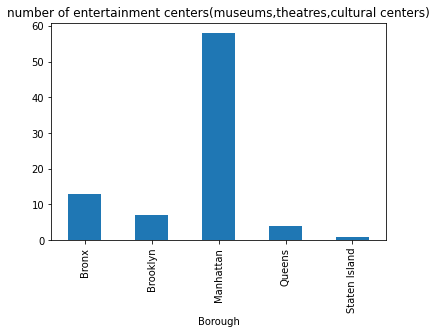

In [ ]:
dfEnterGrouped["Business Organization"].plot.bar()
plt.title("number of entertainment centers(museums,theatres,cultural centers)")
plt.show()

Then, We created 2 maps
---
- First one is the heatmap of entertainment buildings
- Second one is the bus stop shelters locations 

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
heat_df = dfEnter[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])
meanLatitude = dfEnter["Latitude"].mean()
meanLongitude = dfEnter["Longitude"].mean()
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]
meanLocationEnt = folium.Map(location = [meanLatitude,meanLongitude],zoom_start = 13)
HeatMap(heat_data).add_to(meanLocationEnt)
meanLocationEnt

In [ ]:
meanLocationBus = folium.Map(location = [meanLatitude,meanLongitude],zoom_start = 13)
for i in range(len(dfBus["LOCATION"].values)):
  folium.CircleMarker(location=[dfBus["LATITUDE"].values[i],dfBus["LONGITUDE"].values[i]],radius = 5).add_to(meanLocationBus)
meanLocationBus

# 4-) The next steps we are planning to take

  We will try to create a underrated and overrated price map with the datas we have found and analyzes we have done.
  --
  - 
  people can easily see the best price/performance places in the map due to our analyzes about the entertainment and transportation avaliability / price for all types of rooms, so there will be 3 different maps each one will represent a underrated areas that are cheap but good with one room type.